<h1><center>IPL data Analysis<br>Exploratory Analytics Using Pandas Python Packages</center></h1> 

<img src="https://www.proathlix.com/blog/wp-content/uploads/2019/03/ipl.jpg" width=400 height=400 />

Using the IPL matches and IPL deliverables datasets, I have tried to do the following Descriptive Analytics.<br>

<b>Question 1:</b> Is bowling or batting first a better option at a given venue?<br>
<b>Question 2:</b> Is there a correlation between the Winning Team and the Location where the match is held?<br>
<b>Question 3:</b> Who are the top 10 Players? and what is their batting trend over years in IPL ?<br>
<b>Question 4:</b> Identify and Analyse a good Batman's Characteristics?<br>
<b>Question 5:</b> Identify and Analyse a good Bowler's Characteristics?<br>

If the above questions interest you, read further.
I have provided the Python-Pandas Code and Explanation at every step as well.


In [1]:
# Importing the required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Task 1: Read 2 CSV Files - matches.csv and Deliverables.csv 
# The datasets have IPL match data across 2008 - 2017
# matches.csv has 150460 rows
# deliverable.csv has 636 rows

df_matches = pd.read_csv("ipl/matches.csv")
df_delv = pd.read_csv("ipl/deliveries.csv")

In [3]:
df_matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [5]:
df_delv.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### Question 1: Is bowling or batting first a better option at a given venue?

In [6]:
# getting required data from df_del

subset_df = pd.DataFrame()
df_delv['match_id'].unique()
df_delv[df_delv['match_id'] == 1][:1]

for match_id in range(1,637):
        subset_df = subset_df.append(df_delv[df_delv['match_id'] == match_id][:1])

In [7]:
# Steps Followed:

#1. Merging/Joining df_delv & df_matches df to get all the information we need
    #- Joing is done on the match_id column of delv and id column of matches dataset
merged_df = pd.merge(df_matches, subset_df,left_on='id',right_on='match_id')
#2. Take the subset of the df_delv DataFrame with the columns we need
df3 = merged_df[['city','batting_team','bowling_team','winner']]

#3. Filtering the data where winner team is same as batting team 
batting_wins = df3[df3['batting_team'] == df3['winner']]['city'].value_counts()

#4. Filtering the data where winner team is same as bowling team 
bowling_wins = df3[df3['bowling_team'] == df3['winner']]['city'].value_counts()


In [8]:
batting = batting_wins.reset_index()
bowling = bowling_wins.reset_index()

batting2 = batting.rename(columns={'index':'city','city':'batting_wins'})
bowling2 = bowling.rename(columns={'index': 'city', 'city':'bowling_wins'})

merged_wins = pd.merge(batting2, bowling2, on='city')


<Figure size 1080x720 with 0 Axes>

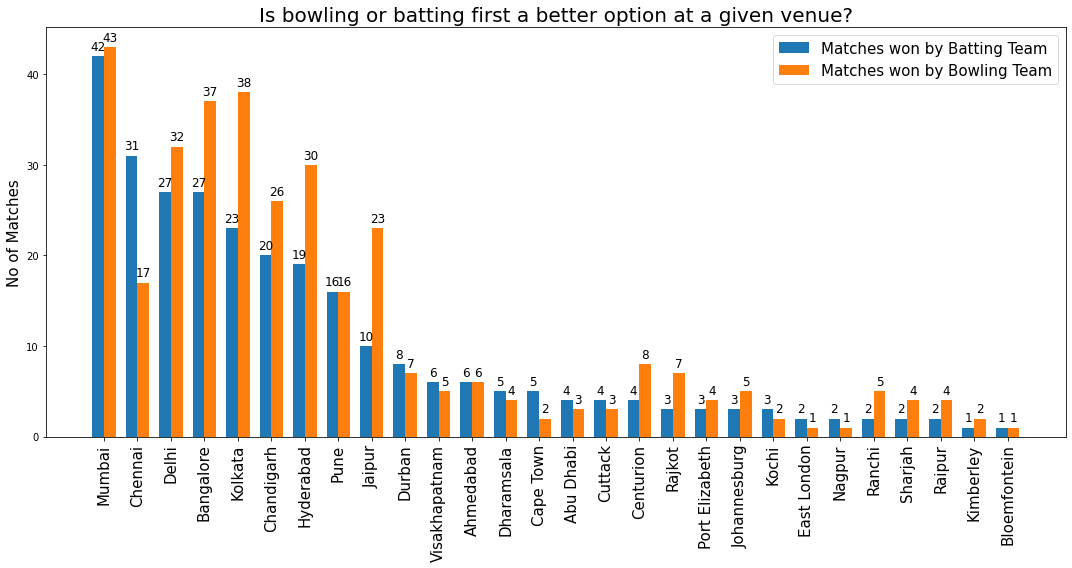

In [9]:
plt.figure(figsize=(15,10))

labels = merged_wins.city
batting_wins = merged_wins.batting_wins
bowling_wins = merged_wins.bowling_wins

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, batting_wins, width, label='Matches won by Batting Team')
rects2 = ax.bar(x + width/2, bowling_wins, width, label='Matches won by Bowling Team')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of Matches', fontsize=15)
ax.set_title('Is bowling or batting first a better option at a given venue?', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.legend(fontsize=15)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Inference:

54.45705024311182


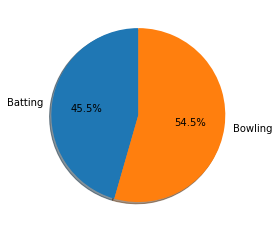

In [10]:
# Pie Chart:
batting_wins = merged_wins['batting_wins'].sum()
bowling_wins = merged_wins['bowling_wins'].sum()
print((bowling_wins/(bowling_wins+batting_wins))*100)
plt.pie([batting_wins,bowling_wins],labels=['Batting','Bowling'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

<b>Yes</b>, From the graph, Bowling First seems to have a <b>9%</b> overall advantage over Batting
1. It is clear that Bowling first has an Advantage over Batting in almost all the locations.
2. However in Chennai the Batting Team has won <b>64%</b> of the times
3. In Venues like Nagpur, Ahmedabad, Pune - There doesn't seem to be much difference.

### Question 2: Is there a correlation between the Winning Team and the Location where the match is held?

In [11]:
# Which Team wons maximum number of times in each location? 
# Find the winning percentage for the winning tyeam

In [12]:
#Steps Followed:
#1. # Finding for a sigle city - Hyderabad
    #- subsetting only the data corresponding to one city to try the logic:
dataset_hyd = df_matches[df_matches['city'] == 'Hyderabad']

#2. Find the winning percentage for the winning tyeam
    #- i.e. (Match count of Team that won maximum no of matches/ no. of matches that took place there)*100
(dataset_hyd['winner'].value_counts()[:1]/dataset_hyd.shape[0])*100

#3. Applying the same logic to all the cities by using groupby on city columns:
x = df_matches.groupby('city').apply(lambda x: (x['winner'].value_counts()[:1]/x.shape[0])*100)

#4. resetting the indexes, so that the groupby object can be converted into a DataFrame - Easy to work with
x = x.reset_index()

#5. Rename columns accordingly
x.rename(columns={'level_1': 'Winning_Team', 'winner':'winning_perc'}, inplace=True)

#6. In the winning percentage columns, rounding the digit to get only the first decimal
x.winning_perc = round(x.winning_perc,1)

x.Winning_Team.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Deccan Chargers', 'Kings XI Punjab',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Kochi Tuskers Kerala',
       'Mumbai Indians'], dtype=object)

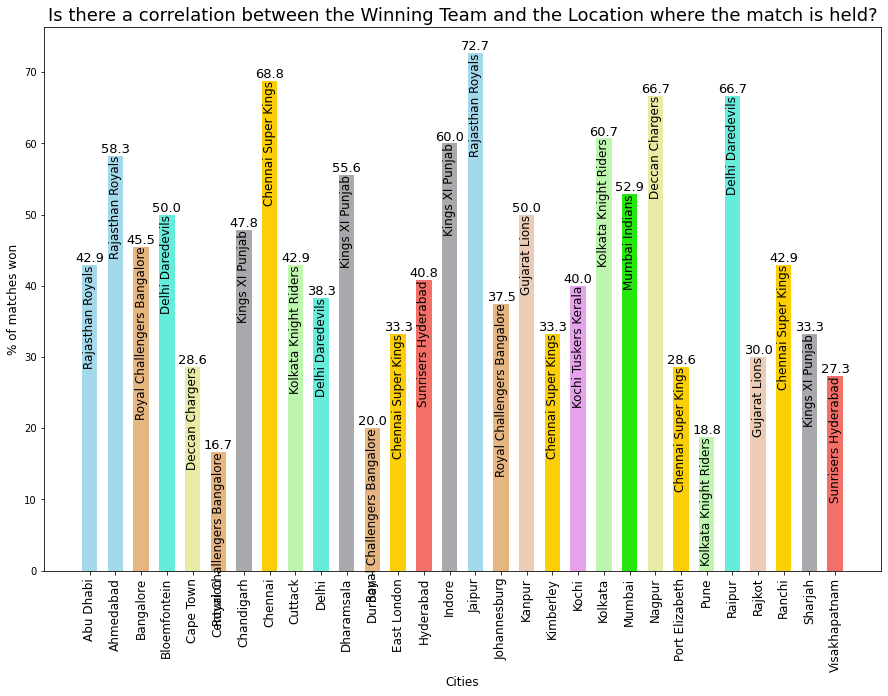

In [13]:
# Plotting the graph:
# Using Bar plot:
plt.figure(figsize=(15,10))
#plt.bar(x.city, x['winning_perc'], width=0.6)
color_dict = {'Rajasthan Royals':'#A3D9EB', 'Royal Challengers Bangalore':'#e5b582',
       'Delhi Daredevils':'#66ECDB', 'Deccan Chargers':'#E8EBA3', 'Kings XI Punjab':'#a8a9ac',
       'Chennai Super Kings':'#fcce06', 'Kolkata Knight Riders':'#BEF5AF',
       'Sunrisers Hyderabad':'#F37068', 'Gujarat Lions':'#ECCCB5', 'Kochi Tuskers Kerala':'#E4A3EB',
       'Mumbai Indians':'#25E70D'}

# The Below code is to have text inside of the bars.
# We need to iterate through every row and set the text
# I have given 2 texts here - 1. Name of the winning team, 2. The percentage of matches it won 
for i in x.iterrows():
    
    plt.bar(i[1].city, i[1].winning_perc, width=0.6, color= color_dict[i[1].Winning_Team])
    plt.text(i[1].city, i[1].winning_perc, i[1].Winning_Team, rotation=90, horizontalalignment='center',verticalalignment='top', color='black', fontsize=12)
    plt.text(i[1].city, i[1].winning_perc, i[1].winning_perc, horizontalalignment='center', verticalalignment='bottom', fontsize=13)
    
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Cities", fontsize=12)
plt.ylabel("% of matches won", fontsize=12)
plt.title("Is there a correlation between the Winning Team and \nthe Location where the match is held?", fontsize=18)
plt.show()

In [14]:
team_homelands = [['Rajasthan Royals','Jaipur'], ['Royal Challengers Bangalore','Bangalore'],
       ['Delhi Daredevils','Delhi'], ['Deccan Chargers','Nagpur'], ['Kings XI Punjab','Chandigarh'],
       ['Chennai Super Kings','Chennai'], ['Kolkata Knight Riders','Kolkata'],
       ['Sunrisers Hyderabad','Hyderabad'], ['Gujarat Lions','Rajkot'], ['Kochi Tuskers Kerala','Kochi'],
       ['Mumbai Indians','Mumbai']]

homelands_df = pd.DataFrame(team_homelands)
homelands_df

# Merging the tables:
team_homeland = pd.merge(x,homelands_df, left_on='Winning_Team', right_on=0)
team_homeland = team_homeland.rename(columns={1:'homeland'})

team_homeland[team_homeland['city'] == team_homeland['homeland']]['winning_perc'].mean()

51.29090909090908

### Inference:

<b>Yes</b>, There is a high correlation between the Winning team and the Location of the Match<br>
Out of all the matches played in a Venue, on an average <b>51.3%</b> of the matches were won by it's Home Team.
1. From the graph, it is evident that the teams that play on their homeland wins maximum number of times
2. So, a team playing in their Homeland have an Advantage. 
3. This could be because they are more familiar with the ground, the pitch etc. 

### Question 3: Who are the top 10 Players and what is their batting trend over years in IPL ?

Calculating Top 10 Batsmen:
I am going to pick the batsmen that scored 'Player_of_the_match' most number of the times in all the IPL matches so far.
Plotiing the trend line:
I am going to plot average(total batsman_runs per match) - plotting this score for every top Batsman across all the seasons of IPL

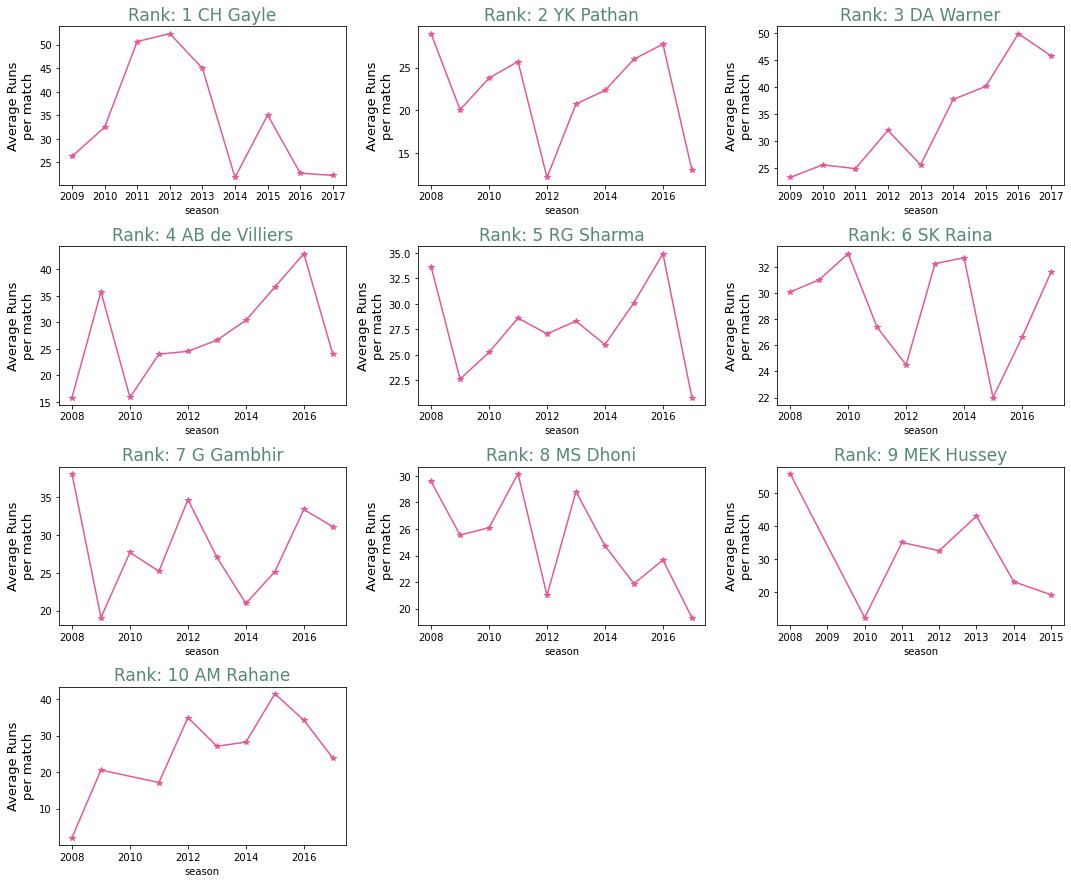

In [15]:
# TrendLine for Top 15 Batsman:
# i.e. Top 15 is calculated as 
#      - Batsmen who have scored the maximum number of "Man of The Match" in IPL in all the given seasons:

# Shortlisting the top 15 and making it into a list object
a = df_matches['player_of_match'].value_counts()[:10]
best_batsmen_list = list(a.index)


# By iterating through every batsman in the list, the mean of (batsman runs/match) is calculated for every season
# The result is updated into a dictionary: key: batsman_name value:Dataframe that contains season and batsman_runs average

# This required me to merge data from df_matches and df_delv by match_id to get season info.

batsman_trend = pd.DataFrame()
dictionary = {}

for batsman in best_batsmen_list:         
    batsman_Y = df_delv[df_delv['batsman']== batsman]
    s = batsman_Y.groupby(['match_id'],as_index=False)['batsman_runs'].sum()
    merged = pd.merge(s,df_matches,left_on='match_id',right_on='id')
    merged.season = merged.season.astype(int)
    batsman_Y_per_season = merged.groupby(['season'], as_index=False)['batsman_runs'].mean()
    dictionary.update({batsman:batsman_Y_per_season})
 
fig = plt.figure(figsize=(15,15))
i = 5
j = 3
k = 1

# Iterating through all the values in the dictionary, line plot done for every batsman

for key,value in dictionary.items():   
    
    ax = plt.subplot(i,j,k)
    #print(subplot)
    ax.plot(value['season'],value['batsman_runs'], marker='*',color='#E45897')
    title = str("Rank: "+ str(k)+" "+key) 
    ax.set_title(title,fontsize=17,color="#558878")
    ax.set_xlabel("season")
    ax.set_ylabel("Average Runs\nper match", fontsize=13)
    k = k+1

plt.tight_layout()
plt.show();
    


### Inference

## Batsman's Metrics:

The Following Metrics are identified to represent the characteristics of a Batsman.

 1. Hard hitting ability - no of 4/6 / no of balls played
 2. Finisher or not - No of matches not out
 3. Fast scoring ability - strike rate - Total runs/Total balls in every match - Average
 4. consistency - average runs/Match

I have calaculated the above Metrics for all the Batsmen. Based upon the score, top 15 Batsmen are determined and their Metrics are plotted.

### Metric 1: Hard hitting ability - no. of 4-s or 6-6 / Total number of balls played

In [16]:
# Calculating for 1 batsman:
batsman_1 = df_delv[df_delv['batsman'] == 'V Sehwag']
#print((batsman_1[(batsman_1['batsman_runs'] == 4) | (batsman_1['batsman_runs'] == 6)]['batsman_runs'].count()/batsman_1['batsman'].count())* 100)
#batsman_1['batsman'].count()

#get top batsmen: - batsmen who played atleast 50 balls total:
x = df_delv.groupby('batsman',as_index=False)['match_id'].count()
x = x[x['match_id'] >= 50]

#x = df_delv['batsman'].value_counts()[:200]
batsman_list = pd.Index.tolist(x.batsman)
#print(batsman_list)
batsmen_atleast_50_balls = pd.DataFrame()

for batsman in batsman_list:
    #print("bowler: ", bowler)
    x = df_delv[df_delv['batsman'] == batsman]
    batsmen_atleast_50_balls = pd.concat([x,batsmen_atleast_50_balls])

# DataFrame of all the data for players who played atleast 50 balls
#batsmen_atleast_50_balls

# Apply to all the batsman in the batsmen_atleast_50_balls DataFrame:

hard_hitting = batsmen_atleast_50_balls.groupby('batsman').apply(lambda x: (x[(x['batsman_runs'] == 4) | (x['batsman_runs'] == 6)]['batsman_runs'].count()/x['batsman'].count())* 100)
hard_hitting = pd.DataFrame(hard_hitting.reset_index())
hard_hitting.rename(columns={0:"percentage_of_4_or_6"}, inplace=True)
hard_hitting_15 = hard_hitting.sort_values('percentage_of_4_or_6',ascending=False)[:15]
#hard_hitting_15 


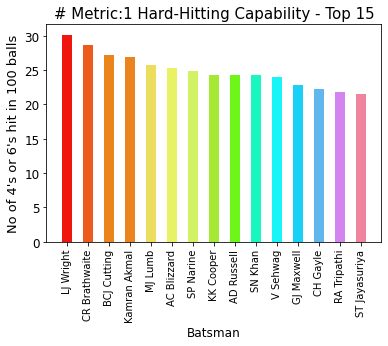

In [144]:

color_band = ['#EF160F', '#EC5B1D', '#EC841D','#EC841D', '#ECDD5F','#E9F264','#D0F264','#A5E934','#6EF619','#19F6BF','#19F4F6','#19D0F6','#5FB7EE','#D484EF','#EF849E']
plt.bar(hard_hitting_15['batsman'],hard_hitting_15['percentage_of_4_or_6'], width=0.5, color=color_band)
plt.title("# Metric:1 Hard-Hitting Capability - Top 15", fontsize=15)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel("No of 4's or 6's hit in 100 balls", fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)

#for i in hard_hitting_15.iterrows():
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, i[1].batsman, horizontalalignment='right', verticalalignment='center', color='black', fontsize=12)
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, round(i[1]['percentage_of_4_or_6'],1), horizontalalignment='left', verticalalignment='center', fontsize=13)
    
plt.show()


### Metric 2: Finisher or Not: No of Matches NOT OUT

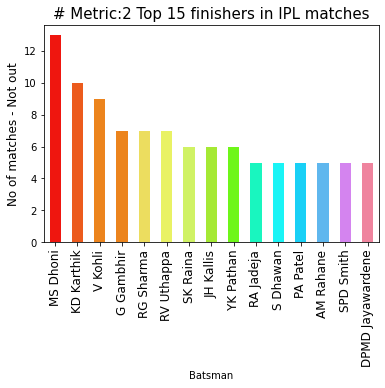

In [119]:
# 2. Finisher or not 

player_dismissed = df_delv[df_delv['player_dismissed'].notnull()][['match_id','batsman','non_striker','player_dismissed']]
#p1 = player_dismissed[player_dismissed['match_id'] == 1
#p1[p1['batsman'] != p1['player_dismissed']][['match_id','batsman']]

finishers = player_dismissed[player_dismissed['batsman'] != player_dismissed['player_dismissed']][['match_id','batsman']]
finishers.rename(columns={'batsman':'finisher'},inplace=True)
finishers = finishers['finisher'].value_counts()[:15]

finishers.plot.bar(color=color_band)
plt.xlabel("Batsman")
plt.xticks(fontsize=12)
plt.ylabel("No of matches - Not out", fontsize=12)
plt.title("# Metric:2 Top 15 finishers in IPL matches", fontsize=15)

plt.show()

### Metric 3: Fast scoring ability - strike rate - Runs/100 balls

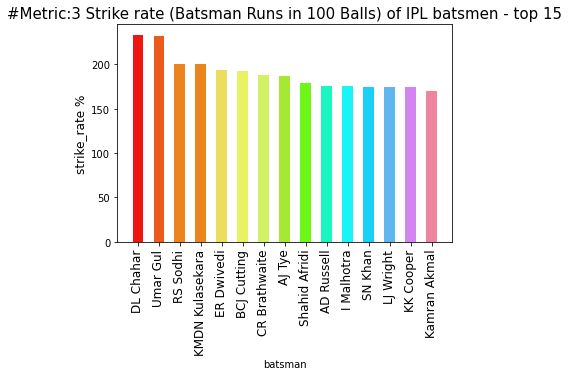

In [149]:
# 3. Fast scoring ability - strike rate - Total runs/Total balls

d1 = df_delv[df_delv['batsman'] == 'S Dhawan'][['match_id','batsman','total_runs','batsman_runs']]
#print(d1['total_runs'].sum()/d1.shape[0])
strike_rate = pd.DataFrame()
strike_rate['batsman'] = pd.Series(df_delv['batsman'])
strike_rate['strike_rate'] = pd.Series(d1['total_runs'].sum() / d1.shape[0])

strike_rate.dropna()

g = df_delv.groupby('batsman').apply(lambda x: (x['total_runs'].sum()/x.shape[0])*100)
strike_rate = g.reset_index()
strike_rate.rename(columns={0:'strike_rate'}, inplace=True)
strike_rate_top_15 = strike_rate.sort_values('strike_rate', ascending=False)[:15]
#strike_rate_top_15

plt.bar(strike_rate_top_15['batsman'], strike_rate_top_15['strike_rate'], width=0.5, color=color_band)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("batsman")
plt.ylabel("strike_rate %", fontsize=12)
plt.title("#Metric:3 Strike rate (Batsman Runs in 100 Balls) of IPL batsmen - top 15", fontsize=15)

#for i in strike_rate_top_15.iterrows():
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, i[1].batsman, horizontalalignment='right', verticalalignment='center', color='black', fontsize=12)
    #plt.text(i[1].batsman,i[1]['strike_rate'], round(i[1]['strike_rate'],1), horizontalalignment='center', verticalalignment='bottom', fontsize=13)

plt.show()


### Metric 4: Consistency - average of (Total runs/match)

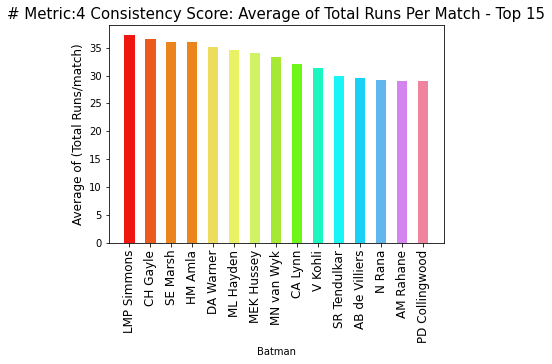

In [56]:
# 4. consistency - average (Total runs/match)

subset = df_delv[df_delv['batsman'] == 'MS Dhoni'][['match_id','inning','batsman','batsman_runs']]
s = subset.groupby(['match_id','batsman'], as_index=False)['batsman_runs'].sum()
consistency_1 = s.groupby('batsman',as_index=False)['batsman_runs'].mean()
consistency_1 

Total_runs_per_match = df_delv.groupby(['match_id','batsman'], as_index=False)['batsman_runs'].sum()
consistency_score = Total_runs_per_match.groupby('batsman',as_index=False)['batsman_runs'].mean()
consistency_score_15 = consistency_score.sort_values('batsman_runs',ascending=False)[:15]
#consistency_score_15

plt.bar(consistency_score_15['batsman'],consistency_score_15['batsman_runs'], width=0.5, color=color_band)
plt.title("# Metric:4 Consistency Score: Average of Total Runs Per Match - Top 15", fontsize=15)
plt.xlabel('Batman')
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Average of (Total Runs/match)", fontsize=12)
plt.show()

## Bowler's Metrics

The Following Metrics are identified to represent the characteristics of a Bowler.

  1. economy - no. of runs conceded/over - average
  2. wicket taking ability - wickets/total no of balls*100
  3. consistency - no of runs/no of wickets
  4. crucial wicket taking ability - how many time 4 or 5 wickets taken/total no of innings played - high performance percentage

I have calaculated the above Metrics for all the Batsmen. Based upon the score, top 15 Batsmen are determined and their Metrics are plotted.

### Metric 1: economy - no. of runs conceded/over - average

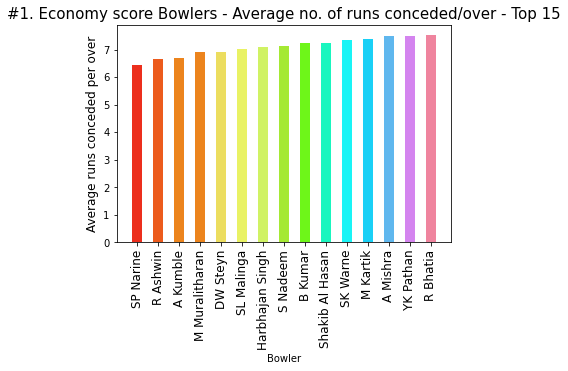

In [32]:
# 1. economy - no. of runs conceded/over - average

# Calculating for 1 Bowler
bowler_1 = df_delv[df_delv['bowler'] == 'TS Mills'][['match_id','over','bowler','total_runs']]
bowler_1

runs_per_over = bowler_1.groupby(['match_id','over','bowler'], as_index=False)['total_runs'].sum()
runs_per_over = runs_per_over['total_runs'].mean()
runs_per_over

#get top bowlers:
x = df_delv['bowler'].value_counts()[:50]
bowlers_list = pd.Index.tolist(x.index)
top_50_bowlers = pd.DataFrame()

for bowler in bowlers_list:
    #print("bowler: ", bowler)
    x = df_delv[df_delv['bowler'] == bowler]
    top_50_bowlers = pd.concat([x,top_50_bowlers])

#top_50_bowlers

# Applying for top 50 Bowlers
runs_per_over = top_50_bowlers.groupby(['match_id','over','bowler'], as_index=False)['total_runs'].sum()
economy = runs_per_over.groupby('bowler', as_index=False)['total_runs'].mean()
economy.rename(columns={'total_runs':'Average runs conceded per over'}, inplace=True)
economy_15 = economy.sort_values('Average runs conceded per over')[:15]
#economy_15

plt.bar(economy_15['bowler'],economy_15['Average runs conceded per over'], width=0.5, color=color_band)
plt.title("#1. Economy score Bowlers - Average no. of runs conceded/over - Top 15", fontsize=15)
plt.xlabel('Bowler')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Average runs conceded per over", fontsize=12)
plt.yticks()
plt.show()

### Metrics 2: wicket taking ability - wickets/total no of balls*100

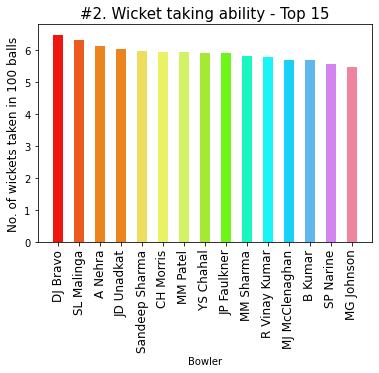

In [150]:
# 2. wicket taking ability - wickets/total no of balls*100

#get top bowlers:
x = df_delv['bowler'].value_counts()[:50]
bowlers_list = pd.Index.tolist(x.index)
top_50_bowlers = pd.DataFrame()

for bowler in bowlers_list:
    #print("bowler: ", bowler)
    x = df_delv[df_delv['bowler'] == bowler]
    top_50_bowlers = pd.concat([x,top_50_bowlers])

#top_50_bowlers

# Calculating for 1 bowler
bowler_2 = top_50_bowlers[top_50_bowlers['bowler'] == 'TS Mills']
#print(bowler_2['dismissal_kind'].count())
#print(bowler_2.shape[0])
#print((bowler_2['dismissal_kind'].count()/bowler_2.shape[0])*100)

# Applying for top 50 Bowlers:
wicket_no_of_balls = top_50_bowlers.groupby('bowler').apply(lambda x: (x['dismissal_kind'].count()/x.shape[0])*100 )
wicket_no_of_balls = pd.DataFrame((wicket_no_of_balls.reset_index()))
wicket_no_of_balls.rename(columns={0:"wicket percentage"}, inplace=True)
wicket_no_of_balls_15 = wicket_no_of_balls.sort_values('wicket percentage',ascending=False)[:15]
#wicket_no_of_balls_15

plt.bar(wicket_no_of_balls_15['bowler'],wicket_no_of_balls_15['wicket percentage'], width=0.5, color=color_band)
plt.title("#2. Wicket taking ability - Top 15", fontsize=15)
plt.xlabel("Bowler")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("No. of wickets taken in 100 balls", fontsize=12)
plt.show()

### Metrics 3: Consistency Score: No. of Balls_per Wicket

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


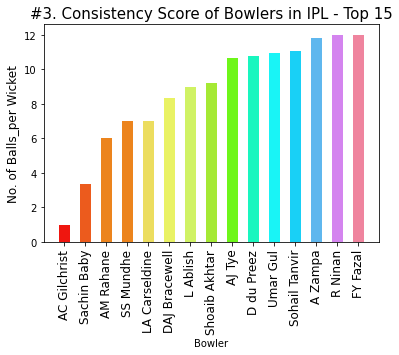

In [146]:
#3. Consistency Score:
bowler_2['bowler'].count()/bowler_2['dismissal_kind'].count()

consistency_score = df_delv.groupby('bowler').apply(lambda x: x['bowler'].count()/x['dismissal_kind'].count())
consistency_score = pd.DataFrame(consistency_score.reset_index())
consistency_score
consistency_score.rename(columns={0:'No. of Balls_per Wicket'}, inplace=True)
consistency_score_15_bowlers = consistency_score.sort_values('No. of Balls_per Wicket')[:15]
#consistency_score_15_bowlers

plt.bar(consistency_score_15_bowlers.bowler, consistency_score_15_bowlers['No. of Balls_per Wicket'], width=0.5, color=color_band)
plt.title("#3. Consistency Score of Bowlers in IPL - Top 15", fontsize=15)
plt.xlabel('Bowler')
plt.ylabel('No. of Balls_per Wicket', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

### Metric 4: crucial wicket taking ability : how many time 4 or 5 wickets taken/total no of innings played - high performance percentage

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


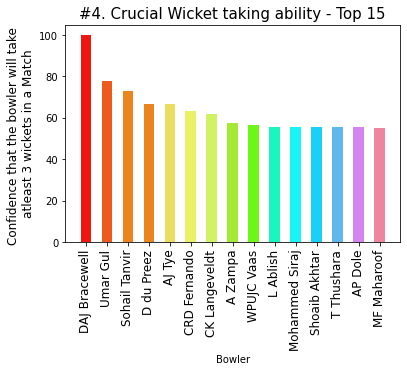

In [147]:
# 4. crucial wicket taking ability 
# - how many time 4 or 5 wickets taken/total no of innings played - high performance percentage

#print(bowler_2['player_dismissed'].count()/4)
#print(bowler_2['match_id'].nunique())
(bowler_2['player_dismissed'].count()/4)/bowler_2['match_id'].nunique()* 100

high_performance_percentage = df_delv.groupby('bowler').apply(lambda x: (x['player_dismissed'].count()/3)/x['match_id'].nunique()* 100)
high_performance_percentage = pd.DataFrame(high_performance_percentage.reset_index())
high_performance_percentage.rename(columns={0:'performance percentage'}, inplace=True)
high_performance_percentage_15 = high_performance_percentage.sort_values('performance percentage', ascending=False)[:15]

plt.bar(high_performance_percentage_15['bowler'],high_performance_percentage_15['performance percentage'], width=0.5, color=color_band)
plt.title("#4. Crucial Wicket taking ability - Top 15", fontsize=15)
plt.xlabel("Bowler")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Confidence that the bowler will take \natleast 3 wickets in a Match", fontsize=12)
plt.show()